In [44]:
# import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lorentzian(x, amplitude, center, gamma, offset):
    """
    Lorentzian function
    amplitude: peak height
    center: peak center position
    gamma: half-width at half-maximum (HWHM)
    offset: baseline offset
    """
    return amplitude * (gamma**2 / ((x - center)**2 + gamma**2)) + offset

# Skip the first row which contains headers 'x' and 'y_final'
graphene_1_data = pd.read_csv('Graphene1_1000to3750_nobase.txt', header=None, skiprows=1)
graphene_2_data = pd.read_csv('Graphene2_1000to3750_nobase.txt', header=None, skiprows=1)

silicon_data = pd.read_csv('Silicon_50to930_nobase.txt', header=None, skiprows=1)

TiSe2_1_data = pd.read_csv('TiSe2_1_-300to300__nobase.txt', header=None, skiprows=1)
TiSe2_2_data = pd.read_csv('TiSe2_2_-300to300__nobase.txt', header=None, skiprows=1)


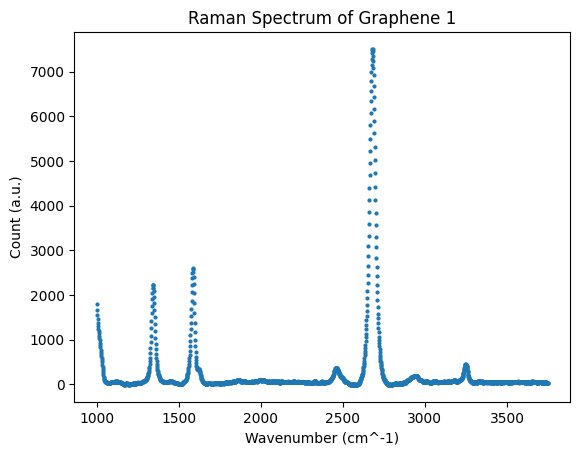

In [45]:
graphene_1_data.columns = ['Wavenumber', 'Count']
graphene_1_data.head()
plt.plot(graphene_1_data['Wavenumber'], graphene_1_data['Count'],'o', markersize=2)
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of Graphene 1')
plt.show()

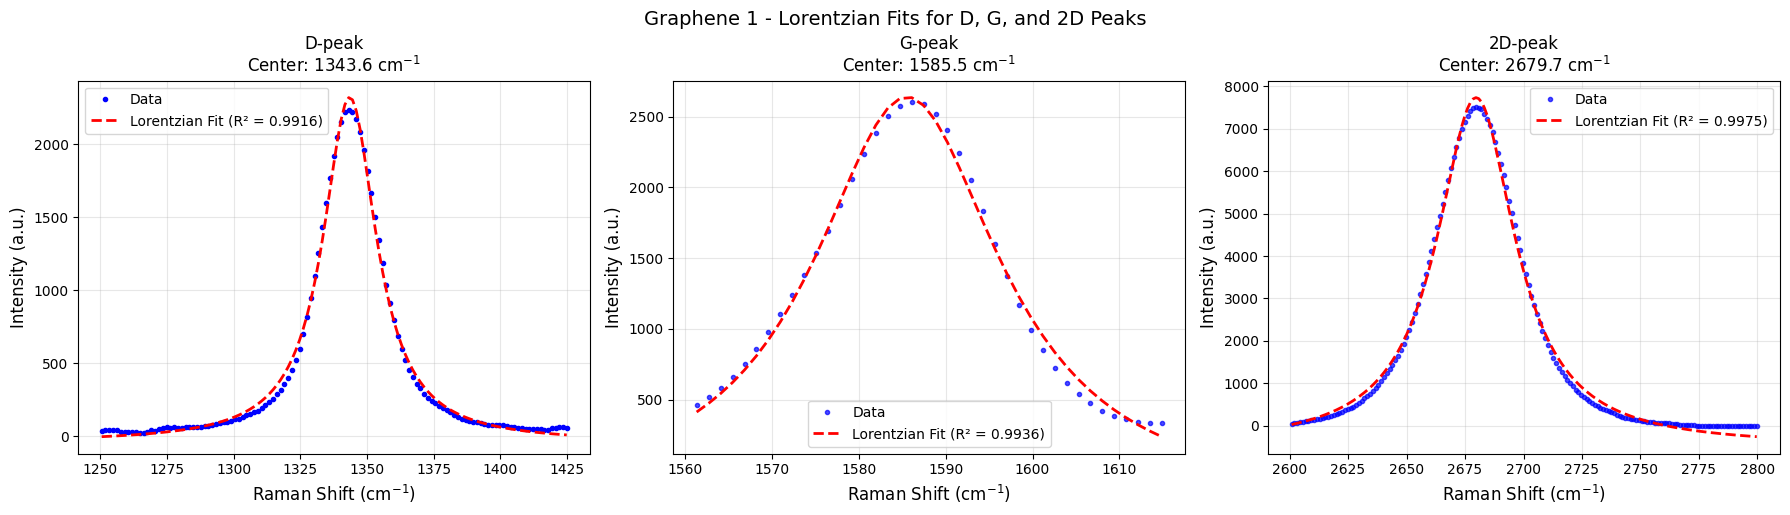

GRAPHENE 1 - FITTED PARAMETERS

D-peak (disorder-induced mode):
  Peak Center: 1343.55 cm⁻¹
  FWHM: 24.43 cm⁻¹
  Amplitude: 2363.09

G-peak (E₂g phonon mode):
  Peak Center: 1585.54 cm⁻¹
  FWHM: 26.35 cm⁻¹
  Amplitude: 2887.01

2D-peak (second-order of D):
  Peak Center: 2679.73 cm⁻¹
  FWHM: -40.85 cm⁻¹
  Amplitude: 8229.96

I(D)/I(G) ratio: 0.819


In [46]:
# Lorentzian fits for Graphene 1 - D, G, and 2D peaks

# Extract full data
x_data_full = graphene_1_data['Wavenumber'].values
y_data_full = graphene_1_data['Count'].values

# ===== D-peak fit (around 1350 cm^-1) =====
mask_d = (x_data_full >= 1250) & (x_data_full <= 1425)
x_d = x_data_full[mask_d]
y_d = y_data_full[mask_d]

initial_guess_d = [max(y_d) - min(y_d), 1350, 20, min(y_d)]
popt_d, _ = curve_fit(lorentzian, x_d, y_d, p0=initial_guess_d)
y_fit_d = lorentzian(x_d, *popt_d)

# ===== G-peak fit (around 1580 cm^-1) =====
mask_g = (x_data_full >= 1560) & (x_data_full <= 1615)
x_g = x_data_full[mask_g]
y_g = y_data_full[mask_g]

initial_guess_g = [max(y_g) - min(y_g), 1585, 15, min(y_g)]
popt_g, _ = curve_fit(lorentzian, x_g, y_g, p0=initial_guess_g)
y_fit_g = lorentzian(x_g, *popt_g)

# ===== 2D-peak fit (around 2700 cm^-1) =====
mask_2d = (x_data_full >= 2600) & (x_data_full <= 2800)
x_2d = x_data_full[mask_2d]
y_2d = y_data_full[mask_2d]

initial_guess_2d = [max(y_2d) - min(y_2d), 2700, 30, min(y_2d)]
popt_2d, _ = curve_fit(lorentzian, x_2d, y_2d, p0=initial_guess_2d)
y_fit_2d = lorentzian(x_2d, *popt_2d)

# ===== Plot all three peaks with fits =====
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# D-peak plot
axes[0].plot(x_d, y_d, 'bo', markersize=3, label='Data')
axes[0].plot(x_d, y_fit_d, 'r--', label=f'Lorentzian Fit (R² = {r2_d:.4f})', linewidth=2)
axes[0].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[0].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[0].set_title(f'D-peak\nCenter: {popt_d[1]:.1f} cm$^{{-1}}$', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# G-peak plot
axes[1].plot(x_g, y_g, 'bo', label='Data', alpha=0.7, markersize=3)
axes[1].plot(x_g, y_fit_g, 'r--', label=f'Lorentzian Fit (R² = {r2_g:.4f})', linewidth=2)
axes[1].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[1].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[1].set_title(f'G-peak\nCenter: {popt_g[1]:.1f} cm$^{{-1}}$', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 2D-peak plot
axes[2].plot(x_2d, y_2d, 'bo', label='Data', alpha=0.7, markersize=3)
axes[2].plot(x_2d, y_fit_2d, 'r--', label=f'Lorentzian Fit (R² = {r2_2d:.4f})', linewidth=2)
axes[2].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[2].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[2].set_title(f'2D-peak\nCenter: {popt_2d[1]:.1f} cm$^{{-1}}$', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Graphene 1 - Lorentzian Fits for D, G, and 2D Peaks', fontsize=14, y=1.02)
plt.show()

# Print all fitted parameters
print("=" * 60)
print("GRAPHENE 1 - FITTED PARAMETERS")
print("=" * 60)
print(f"\nD-peak (disorder-induced mode):")
print(f"  Peak Center: {popt_d[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_d[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_d[0]:.2f}")

print(f"\nG-peak (E₂g phonon mode):")
print(f"  Peak Center: {popt_g[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_g[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_g[0]:.2f}")

print(f"\n2D-peak (second-order of D):")
print(f"  Peak Center: {popt_2d[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_2d[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_2d[0]:.2f}")

print(f"\nI(D)/I(G) ratio: {popt_d[0]/popt_g[0]:.3f}")
print("=" * 60)


G Peak (~1580 cm⁻¹)
The G peak comes from the in-plane vibration of sp²-bonded carbon atoms. It's present in all graphitic materials and represents the stretching of C-C bonds. This is a first-order Raman process and indicates the presence of crystalline graphitic structure.

D Peak (~1350 cm⁻¹)
The D peak (defect peak) indicates disorder or defects in the graphene structure. It arises from breathing modes of carbon rings and requires a defect to activate - it's forbidden in perfect graphene. A strong D peak suggests:

-Edge defects
-Grain boundaries
-Vacancies
-Other structural imperfections

The intensity ratio of D to G peaks (I_D/I_G) is commonly used to assess graphene quality - lower ratios indicate fewer defects.
2D Peak (~2700 cm⁻¹)
The 2D peak (also called G' peak) is actually an overtone of the D peak, but unlike the D peak, it doesn't require defects to appear - it's always present in graphitic materials. This peak is particularly important for graphene because:

-Its shape and intensity help determine the number of graphene layers
-In single-layer graphene, it's a sharp, single peak
-As layers increase, it splits into multiple components
-The 2D/G intensity ratio is used to identify single-layer graphene (typically >2 for monolayer)

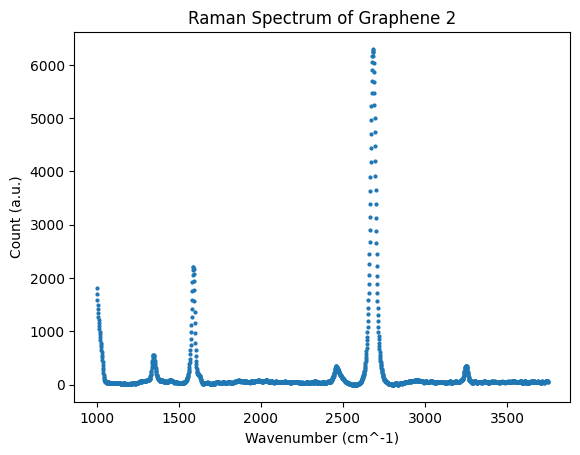

In [47]:
graphene_2_data.columns = ['Wavenumber', 'Count']
# graphine_2_data.head()
plt.plot(graphene_2_data['Wavenumber'], graphene_2_data['Count'],'o', markersize=2)
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of Graphene 2')
plt.show()

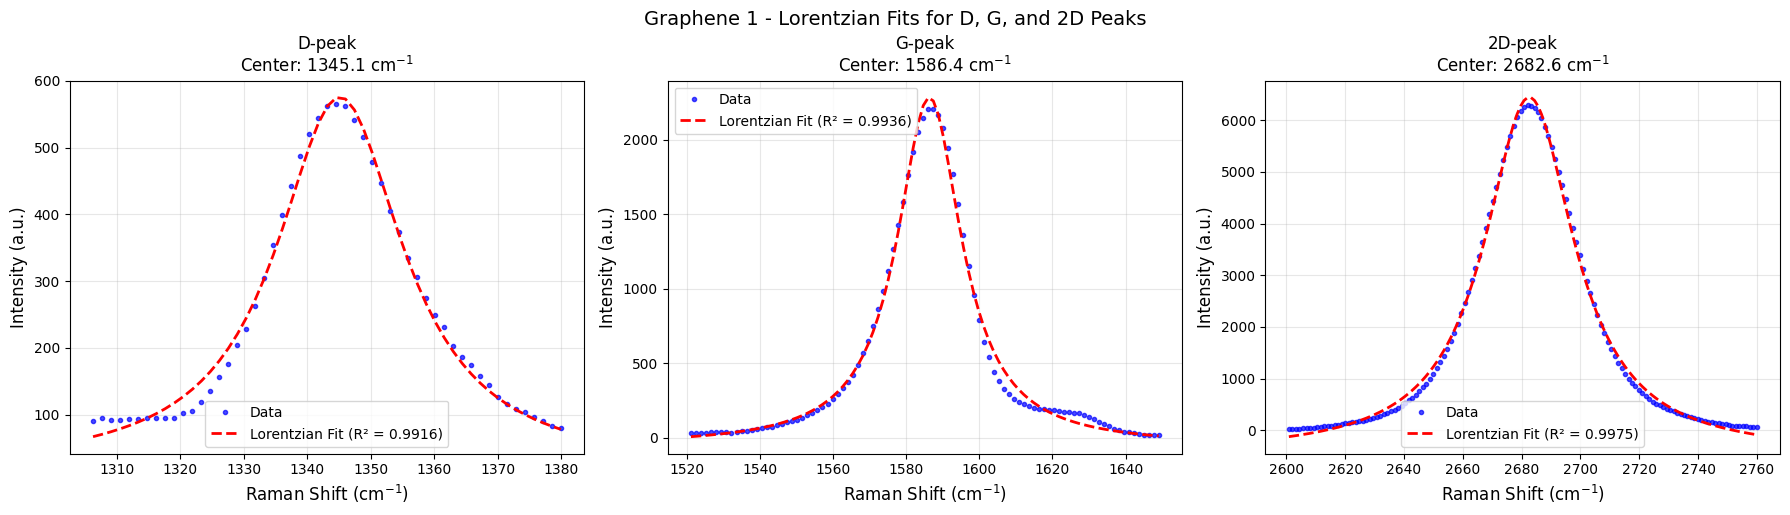

GRAPHENE 1 - FITTED PARAMETERS

D-peak (disorder-induced mode):
  Peak Center: 1345.11 cm⁻¹
  FWHM: 24.45 cm⁻¹
  Amplitude: 558.82

G-peak (E₂g phonon mode):
  Peak Center: 1586.36 cm⁻¹
  FWHM: 21.45 cm⁻¹
  Amplitude: 2339.42

2D-peak (second-order of D):
  Peak Center: 2682.63 cm⁻¹
  FWHM: 37.16 cm⁻¹
  Amplitude: 6906.69

I(D)/I(G) ratio: 0.239


In [ ]:
# Lorentzian fits for Graphene 1 - D, G, and 2D peaks

# Extract full data
x_data_full = graphene_2_data['Wavenumber'].values
y_data_full = graphene_2_data['Count'].values

# ===== D-peak fit (around 1350 cm^-1) =====
mask_d = (x_data_full >= 1305) & (x_data_full <= 1380)
x_d = x_data_full[mask_d]
y_d = y_data_full[mask_d]

initial_guess_d = [max(y_d) - min(y_d), 1350, 20, min(y_d)]
popt_d, _ = curve_fit(lorentzian, x_d, y_d, p0=initial_guess_d)
y_fit_d = lorentzian(x_d, *popt_d)
r2_d = 1 - (np.sum((y_d - y_fit_d)**2) / np.sum((y_d - np.mean(y_d))**2))

# ===== G-peak fit (around 1580 cm^-1) =====
mask_g = (x_data_full >= 1520) & (x_data_full <= 1650)
x_g = x_data_full[mask_g]
y_g = y_data_full[mask_g]

initial_guess_g = [max(y_g) - min(y_g), 1585, 15, min(y_g)]
popt_g, _ = curve_fit(lorentzian, x_g, y_g, p0=initial_guess_g)
y_fit_g = lorentzian(x_g, *popt_g)
r2_g = 1 - (np.sum((y_g - y_fit_g)**2) / np.sum((y_g - np.mean(y_g))**2))

# ===== 2D-peak fit (around 2700 cm^-1) =====
mask_2d = (x_data_full >= 2600) & (x_data_full <= 2760)
x_2d = x_data_full[mask_2d]
y_2d = y_data_full[mask_2d]

initial_guess_2d = [max(y_2d) - min(y_2d), 2700, 30, min(y_2d)]
popt_2d, _ = curve_fit(lorentzian, x_2d, y_2d, p0=initial_guess_2d)
y_fit_2d = lorentzian(x_2d, *popt_2d)
r2_2d = 1 - (np.sum((y_2d - y_fit_2d)**2) / np.sum((y_2d - np.mean(y_2d))**2))

# ===== Plot all three peaks with fits =====
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# D-peak plot
axes[0].plot(x_d, y_d, 'bo', label='Data', alpha=0.7, markersize=3)
axes[0].plot(x_d, y_fit_d, 'r--', label=f'Lorentzian Fit (R² = {r2_d:.4f})', linewidth=2)
axes[0].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[0].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[0].set_title(f'D-peak\nCenter: {popt_d[1]:.1f} cm$^{{-1}}$', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# G-peak plot
axes[1].plot(x_g, y_g, 'bo', label='Data', alpha=0.7, markersize=3)
axes[1].plot(x_g, y_fit_g, 'r--', label=f'Lorentzian Fit (R² = {r2_g:.4f})', linewidth=2)
axes[1].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[1].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[1].set_title(f'G-peak\nCenter: {popt_g[1]:.1f} cm$^{{-1}}$', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 2D-peak plot
axes[2].plot(x_2d, y_2d, 'bo', label='Data', alpha=0.7, markersize=3)
axes[2].plot(x_2d, y_fit_2d, 'r--', label=f'Lorentzian Fit (R² = {r2_2d:.4f})', linewidth=2)
axes[2].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[2].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[2].set_title(f'2D-peak\nCenter: {popt_2d[1]:.1f} cm$^{{-1}}$', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Graphene 1 - Lorentzian Fits for D, G, and 2D Peaks', fontsize=14, y=1.02)
plt.show()

# Print all fitted parameters
print("=" * 60)
print("GRAPHENE 1 - FITTED PARAMETERS")
print("=" * 60)
print(f"\nD-peak (disorder-induced mode):")
print(f"  Peak Center: {popt_d[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_d[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_d[0]:.2f}")

print(f"\nG-peak (E₂g phonon mode):")
print(f"  Peak Center: {popt_g[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_g[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_g[0]:.2f}")

print(f"\n2D-peak (second-order of D):")
print(f"  Peak Center: {popt_2d[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_2d[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_2d[0]:.2f}")

print(f"\nI(D)/I(G) ratio: {popt_d[0]/popt_g[0]:.3f}")
print("=" * 60)

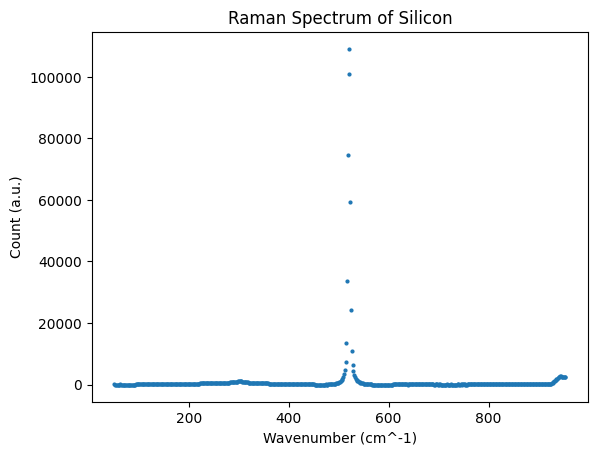

In [49]:
silicon_data.columns = ['Wavenumber', 'Count']
plt.plot(silicon_data['Wavenumber'], silicon_data['Count'],'o', markersize=2)
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of Silicon')
plt.show()

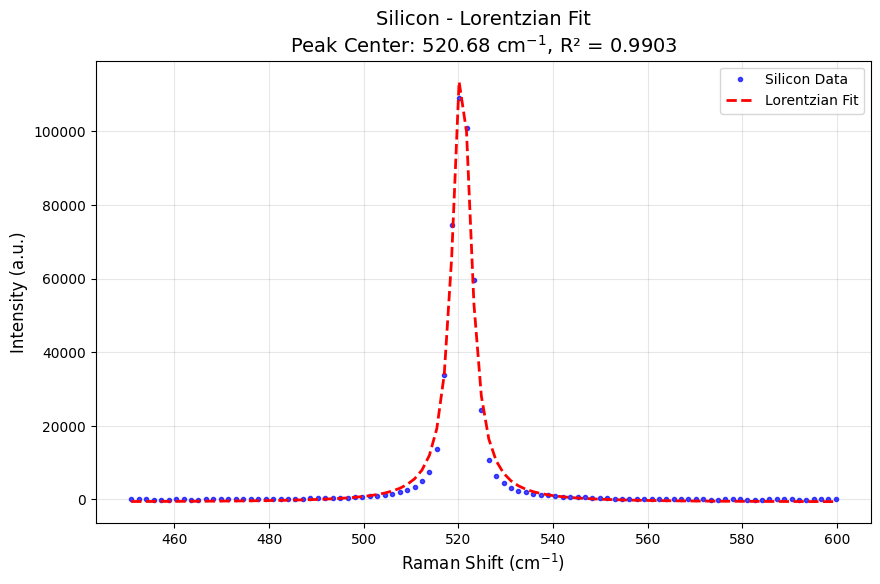

SILICON - FITTED PARAMETERS

Silicon peak (F₂g phonon mode):
  Peak Center: 520.68 cm⁻¹
  FWHM: 4.68 cm⁻¹
  Amplitude: 120311.06
  Baseline Offset: -737.42


In [50]:
# Lorentzian fit for Silicon - main peak around 520 cm^-1

# Extract full data
x_data_full_si = silicon_data['Wavenumber'].values
y_data_full_si = silicon_data['Count'].values

# Filter data for the main Silicon peak (around 450-600 cm^-1)
mask_si = (x_data_full_si >= 450) & (x_data_full_si <= 600)
x_si = x_data_full_si[mask_si]
y_si = y_data_full_si[mask_si]

# Initial guess for parameters [amplitude, center, gamma, offset]
# Silicon peak is typically around 520 cm^-1
initial_guess_si = [max(y_si) - min(y_si), 520, 5, min(y_si)]

# Perform the fit
popt_si, _ = curve_fit(lorentzian, x_si, y_si, p0=initial_guess_si)
y_fit_si = lorentzian(x_si, *popt_si)
r2_si = 1 - (np.sum((y_si - y_fit_si)**2) / np.sum((y_si - np.mean(y_si))**2))

# Plot the data and fit
plt.figure(figsize=(10, 6))
plt.plot(x_si, y_si, 'bo', label='Silicon Data', alpha=0.7, markersize=3)
plt.plot(x_si, y_fit_si, 'r--', label=f'Lorentzian Fit (R² = {r2_si:.4f})', linewidth=2)
plt.xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
plt.ylabel('Intensity (a.u.)', fontsize=12)
plt.title(f'Silicon - Lorentzian Fit\nPeak Center: {popt_si[1]:.2f} cm$^{{-1}}$', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print fitted parameters
print("=" * 60)
print("SILICON - FITTED PARAMETERS")
print("=" * 60)
print(f"\nSilicon peak (F₂g phonon mode):")
print(f"  Peak Center: {popt_si[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_si[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_si[0]:.2f}")
print(f"  Baseline Offset: {popt_si[3]:.2f}")
print("=" * 60)


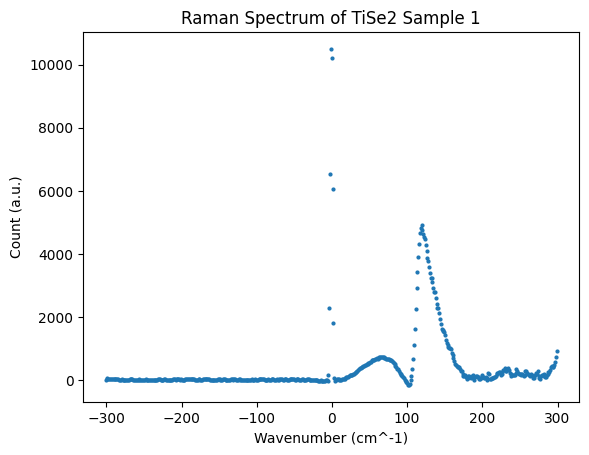

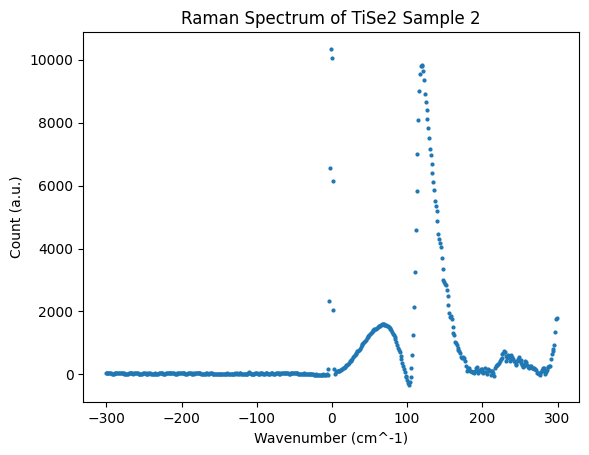

In [51]:
TiSe2_1_data.columns = ['Wavenumber', 'Count']
plt.plot(TiSe2_1_data['Wavenumber'], TiSe2_1_data['Count'],'o', markersize=2)
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of TiSe2 Sample 1')
plt.show()
TiSe2_2_data.columns = ['Wavenumber', 'Count']
plt.plot(TiSe2_2_data['Wavenumber'], TiSe2_2_data['Count'],'o', markersize=2)
plt.xlabel('Wavenumber (cm^-1)')  
plt.ylabel('Count (a.u.)')
plt.title('Raman Spectrum of TiSe2 Sample 2')
plt.show()

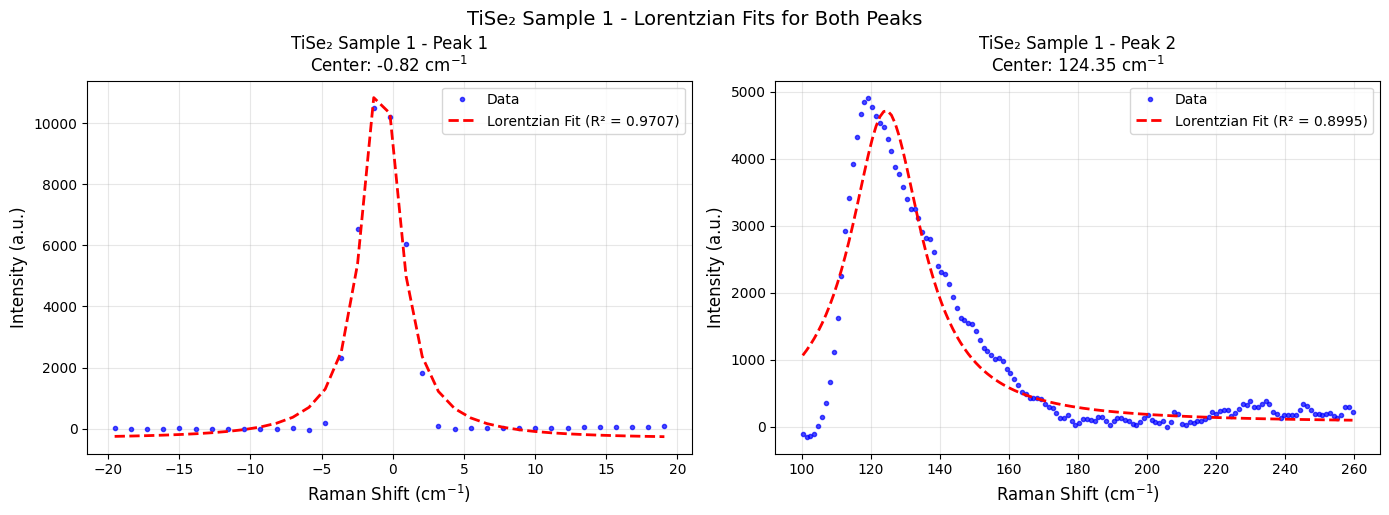

TiSe₂ SAMPLE 1 - FITTED PARAMETERS

Peak 1:
  Peak Center: -0.82 cm⁻¹
  FWHM: -3.05 cm⁻¹
  Amplitude: 12443.03

Peak 2:
  Peak Center: 124.35 cm⁻¹
  FWHM: 25.38 cm⁻¹
  Amplitude: 4658.19

Intensity ratio (Peak 2 / Peak 1): 0.374


In [52]:
# Lorentzian fits for TiSe2 Sample 1 - Two peaks
# Peak 1: around 0 cm^-1
# Peak 2: around 129 cm^-1

# Extract data for TiSe2 Sample 1
x_data_tise2_1_full = TiSe2_1_data['Wavenumber'].values
y_data_tise2_1_full = TiSe2_1_data['Count'].values

# ===== Peak 1 fit (around 0 cm^-1) =====
mask_t1_peak1 = (x_data_tise2_1_full >= -20) & (x_data_tise2_1_full <= 20)
x_t1_p1 = x_data_tise2_1_full[mask_t1_peak1]
y_t1_p1 = y_data_tise2_1_full[mask_t1_peak1]

initial_guess_t1_p1 = [max(y_t1_p1) - min(y_t1_p1), 0, 10, min(y_t1_p1)]
popt_t1_p1, _ = curve_fit(lorentzian, x_t1_p1, y_t1_p1, p0=initial_guess_t1_p1)
y_fit_t1_p1 = lorentzian(x_t1_p1, *popt_t1_p1)
r2_t1_p1 = 1 - (np.sum((y_t1_p1 - y_fit_t1_p1)**2) / np.sum((y_t1_p1 - np.mean(y_t1_p1))**2))

# ===== Peak 2 fit (around 129 cm^-1) =====
mask_t1_peak2 = (x_data_tise2_1_full >= 100) & (x_data_tise2_1_full <= 260)
x_t1_p2 = x_data_tise2_1_full[mask_t1_peak2]
y_t1_p2 = y_data_tise2_1_full[mask_t1_peak2]

initial_guess_t1_p2 = [max(y_t1_p2) - min(y_t1_p2), 129, 10, min(y_t1_p2)]
popt_t1_p2, _ = curve_fit(lorentzian, x_t1_p2, y_t1_p2, p0=initial_guess_t1_p2)
y_fit_t1_p2 = lorentzian(x_t1_p2, *popt_t1_p2)
r2_t1_p2 = 1 - (np.sum((y_t1_p2 - y_fit_t1_p2)**2) / np.sum((y_t1_p2 - np.mean(y_t1_p2))**2))

# ===== Plot both peaks with fits =====
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Peak 1
axes[0].plot(x_t1_p1, y_t1_p1, 'bo', label='Data', alpha=0.7, markersize=3)
axes[0].plot(x_t1_p1, y_fit_t1_p1, 'r--', label=f'Lorentzian Fit (R² = {r2_t1_p1:.4f})', linewidth=2)
axes[0].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[0].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[0].set_title(f'TiSe₂ Sample 1 - Peak 1\nCenter: {popt_t1_p1[1]:.2f} cm$^{{-1}}$', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Peak 2
axes[1].plot(x_t1_p2, y_t1_p2, 'bo', label='Data', alpha=0.7, markersize=3)
axes[1].plot(x_t1_p2, y_fit_t1_p2, 'r--', label=f'Lorentzian Fit (R² = {r2_t1_p2:.4f})', linewidth=2)
axes[1].set_xlabel('Raman Shift (cm$^{-1}$)', fontsize=12)
axes[1].set_ylabel('Intensity (a.u.)', fontsize=12)
axes[1].set_title(f'TiSe₂ Sample 1 - Peak 2\nCenter: {popt_t1_p2[1]:.2f} cm$^{{-1}}$', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('TiSe₂ Sample 1 - Lorentzian Fits for Both Peaks', fontsize=14, y=1.02)
plt.show()

# Print fitted parameters
print("=" * 60)
print("TiSe₂ SAMPLE 1 - FITTED PARAMETERS")
print("=" * 60)

print(f"\nPeak 1:")
print(f"  Peak Center: {popt_t1_p1[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_t1_p1[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_t1_p1[0]:.2f}")

print(f"\nPeak 2:")
print(f"  Peak Center: {popt_t1_p2[1]:.2f} cm⁻¹")
print(f"  FWHM: {2*popt_t1_p2[2]:.2f} cm⁻¹")
print(f"  Amplitude: {popt_t1_p2[0]:.2f}")

print(f"\nIntensity ratio (Peak 2 / Peak 1): {popt_t1_p2[0]/popt_t1_p1[0]:.3f}")
print("=" * 60)


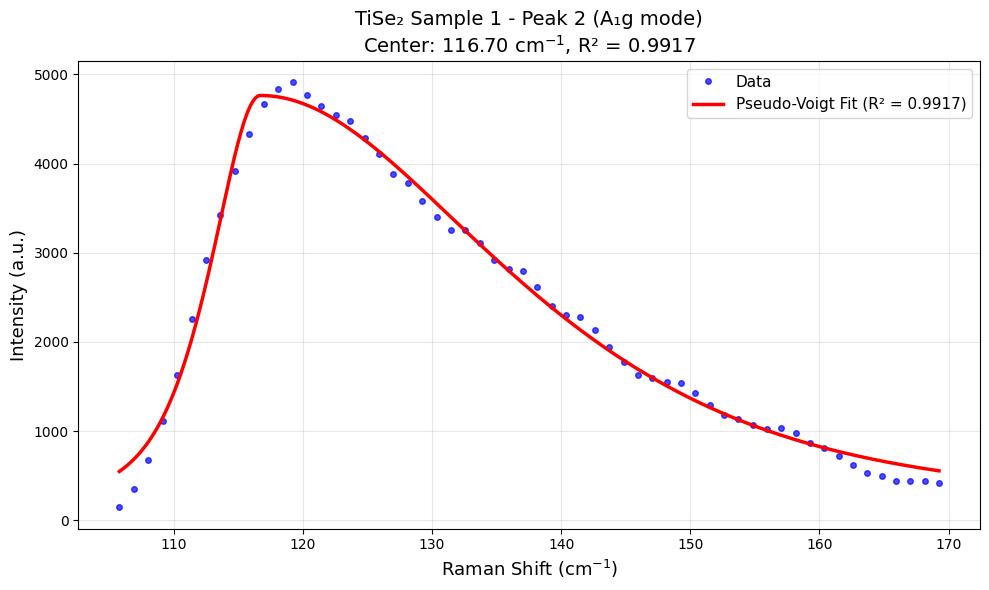

TiSe₂ SAMPLE 1 - PEAK 2 SPLIT PSEUDO-VOIGT FIT

FITTED PARAMETERS:
  Peak Center: 116.70 cm⁻¹
  Left Width: 4.66 cm⁻¹
  Right Width: 22.59 cm⁻¹
  Width Asymmetry Ratio (Right/Left): 4.84
  Mixing Parameter (η): 0.700
  → 70.0% Lorentzian, 30.0% Gaussian
  Baseline Offset: 0.00 a.u.

R-squared: 0.9917
Fit Quality: Excellent

Average FWHM: 13.63 cm⁻¹
Asymmetry: Right tail is broader (typical for TiSe₂ A₁g mode)


In [54]:
# Split pseudo-Voigt fit for TiSe2 Sample 1 - Peak 2
# Best for asymmetric peaks with different left/right widths

def split_pseudo_voigt(x, amplitude, center, width_left, width_right, eta, offset):
    """
    Split pseudo-Voigt with different widths on each side
    amplitude: peak height above baseline
    center: peak center
    width_left: width for x < center
    width_right: width for x >= center
    eta: mixing parameter (0=pure Gaussian, 1=pure Lorentzian)
    offset: baseline offset
    """
    dx = x - center
    width = np.where(dx < 0, width_left, width_right)
    
    # Gaussian component
    gaussian = np.exp(-np.log(2) * (dx / width)**2)
    
    # Lorentzian component
    lorentzian = 1 / (1 + (dx / width)**2)
    
    # Pseudo-Voigt: linear combination
    profile = eta * lorentzian + (1 - eta) * gaussian
    
    return amplitude * profile + offset

# Extract data for TiSe2 Sample 1
x_data_tise2_1_full = TiSe2_1_data['Wavenumber'].values
y_data_tise2_1_full = TiSe2_1_data['Count'].values

# ===== Split pseudo-Voigt fit for Peak 2 (around 124 cm^-1) =====
# Narrower range to focus on peak region and reduce influence of far tails
mask_peak2 = (x_data_tise2_1_full >= 105) & (x_data_tise2_1_full <= 170)
x_peak2 = x_data_tise2_1_full[mask_peak2]
y_peak2 = y_data_tise2_1_full[mask_peak2]

# Calculate better initial parameters
peak_height = max(y_peak2) - min(y_peak2)
baseline = min(y_peak2)

# Initial guess: [amplitude, center, width_left, width_right, eta, offset]
# Use pure Lorentzian (eta=1.0) for sharpest possible peak
# Allow extremely narrow left width for very sharp rise
initial_split = [peak_height * 5.5, 117, 2.5, 22, 0.95, baseline]

# Set bounds to allow proper peak height - be very generous with upper bound
# Make sure baseline bounds work for both positive and negative values
# Allow extremely narrow left width (down to 1.0 cm⁻¹) for sharp left edge
# Force eta to be high (mostly Lorentzian) for sharp peak
baseline_lower = min(baseline * 1.5, baseline * 0.5) if baseline < 0 else 0
baseline_upper = max(baseline * 1.5, baseline * 0.5) if baseline < 0 else max(baseline * 2, 1000)

bounds_lower = [0, 110, 1.0, 5, 0.7, baseline_lower]  # Extremely sharp left edge, force Lorentzian
bounds_upper = [peak_height * 15, 135, 10, 50, 1.0, baseline_upper]  # Even higher amplitude, narrower left

try:
    popt_split, pcov = curve_fit(split_pseudo_voigt, x_peak2, y_peak2, 
                                  p0=initial_split,
                                  bounds=(bounds_lower, bounds_upper),
                                  maxfev=30000)
    y_fit_split = split_pseudo_voigt(x_peak2, *popt_split)
    
    # Calculate R-squared
    residuals = y_peak2 - y_fit_split
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_peak2 - np.mean(y_peak2))**2)
    r2_split = 1 - (ss_res / ss_tot)
    
    # Generate smooth fit curve
    x_fine = np.linspace(x_peak2.min(), x_peak2.max(), 1000)
    y_fine = split_pseudo_voigt(x_fine, *popt_split)
    
    # Simple clean plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_peak2, y_peak2, 'bo', label='Data', alpha=0.7, markersize=4)
    plt.plot(x_fine, y_fine, 'r-', label=f'Pseudo-Voigt Fit (R² = {r2_split:.4f})', linewidth=2.5)
    plt.xlabel('Raman Shift (cm$^{-1}$)', fontsize=13)
    plt.ylabel('Intensity (a.u.)', fontsize=13)
    plt.title(f'TiSe₂ Sample 1 - Peak 2 (A₁g mode)\nCenter: {popt_split[1]:.2f} cm$^{{-1}}$, R² = {r2_split:.4f}', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print fitted parameters
    print("=" * 70)
    print("TiSe₂ SAMPLE 1 - PEAK 2 SPLIT PSEUDO-VOIGT FIT")
    print("=" * 70)
    print(f"\nFITTED PARAMETERS:")
    print(f"  Peak Center: {popt_split[1]:.2f} cm⁻¹")
    print(f"  Left Width: {popt_split[2]:.2f} cm⁻¹")
    print(f"  Right Width: {popt_split[3]:.2f} cm⁻¹")
    print(f"  Width Asymmetry Ratio (Right/Left): {popt_split[3]/popt_split[2]:.2f}")
    print(f"  Mixing Parameter (η): {popt_split[4]:.3f}")
    print(f"  → {popt_split[4]*100:.1f}% Lorentzian, {(1-popt_split[4])*100:.1f}% Gaussian")
    print(f"  Baseline Offset: {popt_split[5]:.2f} a.u.")
    print(f"\nR-squared: {r2_split:.4f}")
    print(f"Fit Quality: {'Excellent' if r2_split > 0.98 else 'Good' if r2_split > 0.95 else 'Fair' if r2_split > 0.90 else 'Poor'}")
    
    avg_width = (popt_split[2] + popt_split[3]) / 2
    print(f"\nAverage FWHM: {avg_width:.2f} cm⁻¹")
    
    if popt_split[3] > popt_split[2]:
        print(f"Asymmetry: Right tail is broader (typical for TiSe₂ A₁g mode)")
    else:
        print(f"Asymmetry: Left tail is broader")
    
    print("=" * 70)
    
except Exception as e:
    print(f"Split pseudo-Voigt fit failed: {e}")
    print("Try adjusting the initial parameters or fitting range.")
